## 1.数据创建

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# 数据生成
from sklearn import  datasets
X,y = datasets.make_moons(n_samples=100, noise=0.005, random_state=666)

## 2.数据可视化

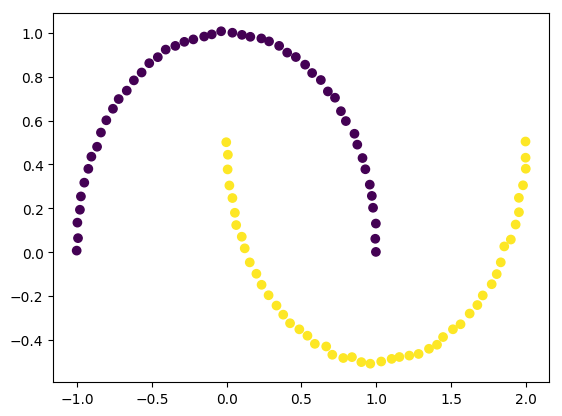

In [75]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## 3.定义DBSCAN

In [76]:
import numpy as np
import random
# 寻找eps邻域内的点
def findNeighbor(j, X, eps):
    N = []
    for p in range(X.shape[0]): # 找到邻域内对象
        temp = np.sqrt(np.sum(np.square(X[j]-X[p])))
        if(temp <= eps):
            N.append(p)
    return N

In [77]:
# DBSCAN算法
def dbscan(X, eps, min_Pts):
    '''
    X:样本数据
    eps:半径
    min_Pts:最少点个数
    '''
    k = -1
    NeighborPts = [] # 某点邻域内的对象
    Ner_NeighborPts = []
    fil = [] # 初始时已访问对象列表为空
    gama = [x for x in range(len(X))] # 初始时将所有点标记为未访问
    cluster = [-1 for y in range(len(X))]

    while len(gama) > 0:
        j = random.choice(gama)
        gama.remove(j) # 未访问列表中移除
        fil.append(j) # 访问对象列表 fil
        NeighborPts = findNeighbor(j, X, eps) 
        if len(NeighborPts) < min_Pts:
            cluster[j] = -1
        else:
            k = k + 1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fil:
                    gama.remove(i)
                    fil.append(i)
                    Ner_NeighborPts = findNeighbor(i, X, eps)
                    if len(Ner_NeighborPts) >= min_Pts:
                        for a in Ner_NeighborPts:
                            if a not in NeighborPts:
                                NeighborPts.append(a)
                    if (cluster[i] == -1):
                        cluster[i] = k
    return cluster

## 4.对数据集进行聚类

In [78]:
# dbscan 模型预测
y_pred = dbscan(X, eps=0.5, min_Pts=10)
print(y)
print(y_pred)
# 计算吻合度
acc = accuracy_score(y, y_pred)
print("聚类的精确度：{:.2f}%".format(acc * 100))

[1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0]
[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
聚类的精确度：100.00%


## 5.sklearn库中DBSCAN

In [79]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=10)
result = dbscan.fit_predict(X)
result

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

## 6.对聚类结果可视化

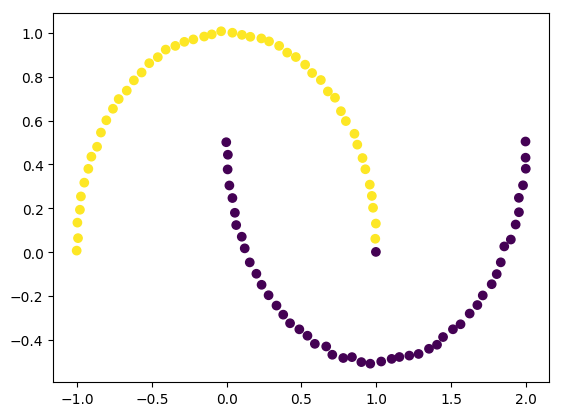

In [80]:
plt.scatter(X[:,0], X[:,1], c=result)
plt.show()